# **DỰ ĐOÁN LƯỢNG MƯA**

Nhóm thông tin chung
Date: Ngày ghi nhận


Location: Địa điểm trạm quan trắc.

Nhóm nhiệt độ & Độ ẩm
MinTemp / MaxTemp: Nhiệt độ thấp nhất / cao nhất trong ngày.

Temp9am / Temp3pm: Nhiệt độ lúc 9h sáng / 3h chiều.

Humidity9am / Humidity3pm: Độ ẩm lúc 9h sáng / 3h chiều.

Nhóm lượng mưa & Độ che phủ

Rainfall: Lượng mưa hôm nay (mm)(Biến mục tiêu).

Evaporation: Độ bốc hơi nước.

Sunshine: Số giờ nắng.

Cloud9am / Cloud3pm: Độ che phủ của mây lúc 9h sáng / 3h chiều.

Nhóm gió & Áp suất
WindGustDir / WindGustSpeed: Hướng / Tốc độ gió giật mạnh nhất.

WindDir / WindSpeed (9am/3pm): Hướng / Tốc độ gió lúc 9h sáng và 3h chiều.

Pressure9am / Pressure3pm: Áp suất khí quyển lúc 9h sáng / 3h chiều.

RainToday: Hôm nay có mưa không (Yes/No).



# 1. KHAI BÁO CÁC THƯ VIỆN CẦN THIẾT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.1 Đọc file dữ liệu

In [ ]:
# Đọc file
data = pd.read_csv('/content/drive/MyDrive/KPDL2/weatherAUS.csv')
# Xem Kích thước
print(data.shape)
# Xem 5 dòng đầu tiên
data.head(5)

(145460, 22)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


Tập dữ liệu (AUS.csv) có 145,460 hàng và 22 cột.

### 1.2 Thông tin về kiểu dữ liệu và số lượng giá trị thiếu

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Có 16 cột kiểu số (float64) và 6 cột kiểu đối tượng (object).

Nhiều cột có giá trị thiếu (Non-Null Count nhỏ hơn 145,460), đặc biệt là các cột như Evaporation, Sunshine, Cloud9am, Cloud3pm có rất nhiều giá trị thiếu.

Cột Date và Location không có giá trị thiếu.

In [ ]:
# Tạo một bản sao của data
df = data.copy()

# 2. TIỀN XỬ LÝ DỮ LIỆU

###2.1 Chuẩn hoá chữ thường

In [ ]:
# 1. Chuyển tên cột về chữ thường
df.columns = df.columns.str.lower()
# 2. Chuyển toàn bộ dữ liệu dạng text về chữ thường
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.head(5)

/tmp/ipython-input-2139671441.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday
0,12/1/2008,albury,13.4,22.9,0.6,NaN,NaN,w,44.0,w,wnw,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,no
1,12/2/2008,albury,7.4,25.1,0.0,NaN,NaN,wnw,44.0,nnw,wsw,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,no
2,12/3/2008,albury,12.9,25.7,0.0,NaN,NaN,wsw,46.0,w,wsw,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,no
3,12/4/2008,albury,9.2,28.0,0.0,NaN,NaN,ne,24.0,se,e,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,no
4,12/5/2008,albury,17.5,32.3,1.0,NaN,NaN,w,41.0,ene,nw,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,no


###2.4 Chuẩn hoá giá trị Boolean

In [ ]:
# Chuyển đổi raintoday: 'no' thành 0 và 'yes' thành 1
df['raintoday'] = df['raintoday'].map({'no': 0, 'yes': 1})
df.head(5)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday
0,12/1/2008,albury,13.4,22.9,0.6,NaN,NaN,w,44.0,w,wnw,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,12/2/2008,albury,7.4,25.1,0.0,NaN,NaN,wnw,44.0,nnw,wsw,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12/3/2008,albury,12.9,25.7,0.0,NaN,NaN,wsw,46.0,w,wsw,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,12/4/2008,albury,9.2,28.0,0.0,NaN,NaN,ne,24.0,se,e,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0
4,12/5/2008,albury,17.5,32.3,1.0,NaN,NaN,w,41.0,ene,nw,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0


### 2.2 Xử lý giá trị thiếu

In [ ]:
df.isnull().sum()

,0
date,0
location,0
mintemp,1485
maxtemp,1261
rainfall,3261
evaporation,62790
sunshine,69835
windgustdir,10326
windgustspeed,10263
winddir9am,10566


In [ ]:
# Xoá những dòng mà cột rainfall và bị trống (tránh sai lệch dữ liệu)
df = df.dropna(subset=['rainfall'])

Xoá dữ liệu thiếu của hai cột mintemp và maxtemp vì nó chiếm tỷ lệ ít khoảng 0.3%

In [ ]:
df = df.dropna(subset=['mintemp', 'maxtemp'])

 xử lý giá trị thiếu cho các cột còn lại bằng các điền giá trị thiếu theo nhóm vị trí và tháng

In [ ]:
# Tạo cột tháng
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
# Danh sách các cột Số cần điền theo nhóm (Location, Month)
num_to_fill = [
    'sunshine', 'evaporation', 'cloud3pm', 'cloud9am','temp9am',
    'pressure9am', 'pressure3pm', 'windgustspeed','temp3pm',
    'humidity3pm', 'windspeed3pm', 'humidity9am','windspeed9am'
]
for col in num_to_fill:
    # Điền bằng trung vị của nhóm
    df[col] = df[col].fillna(df.groupby(['location', 'month'])[col].transform('median'))
    # Điền nốt bằng trung vị tổng nếu nhóm đó bị trống hoàn toàn
    df[col] = df[col].fillna(df[col].median())

# Danh sách các cột Phân loại cần điền theo nhóm
cat_to_fill = ['winddir9am', 'windgustdir', 'winddir3pm','windgustdir']
for col in cat_to_fill:
    # Với cột chữ, điền bằng giá trị xuất hiện nhiều nhất của nhóm đó
    df[col] = df.groupby(['location', 'month'])[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df[col].mode()[0]))

In [ ]:
# Xem lại giá trị thiếu
df.isnull().sum()

,0
date,0
location,0
mintemp,0
maxtemp,0
rainfall,0
evaporation,0
sunshine,0
windgustdir,0
windgustspeed,0
winddir9am,0


Dữ liệu đã không còn giá trị thiếu nào nữa

###2.3 Kiểm tra trùng lặp

In [ ]:
df.duplicated().sum()

np.int64(0)

Không có dòng nào trùng lặp

#PHÂN TÍCH MÔ TẢ

In [ ]:
# Kiểm tra thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141330 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           141330 non-null  datetime64[ns]
 1   location       141330 non-null  object        
 2   mintemp        141330 non-null  float64       
 3   maxtemp        141330 non-null  float64       
 4   rainfall       141330 non-null  float64       
 5   evaporation    141330 non-null  float64       
 6   sunshine       141330 non-null  float64       
 7   windgustdir    141330 non-null  object        
 8   windgustspeed  141330 non-null  float64       
 9   winddir9am     141330 non-null  object        
 10  winddir3pm     141330 non-null  object        
 11  windspeed9am   141330 non-null  float64       
 12  windspeed3pm   141330 non-null  float64       
 13  humidity9am    141330 non-null  float64       
 14  humidity3pm    141330 non-null  float64       
 15  press

###3.1 Phân tích tương quan

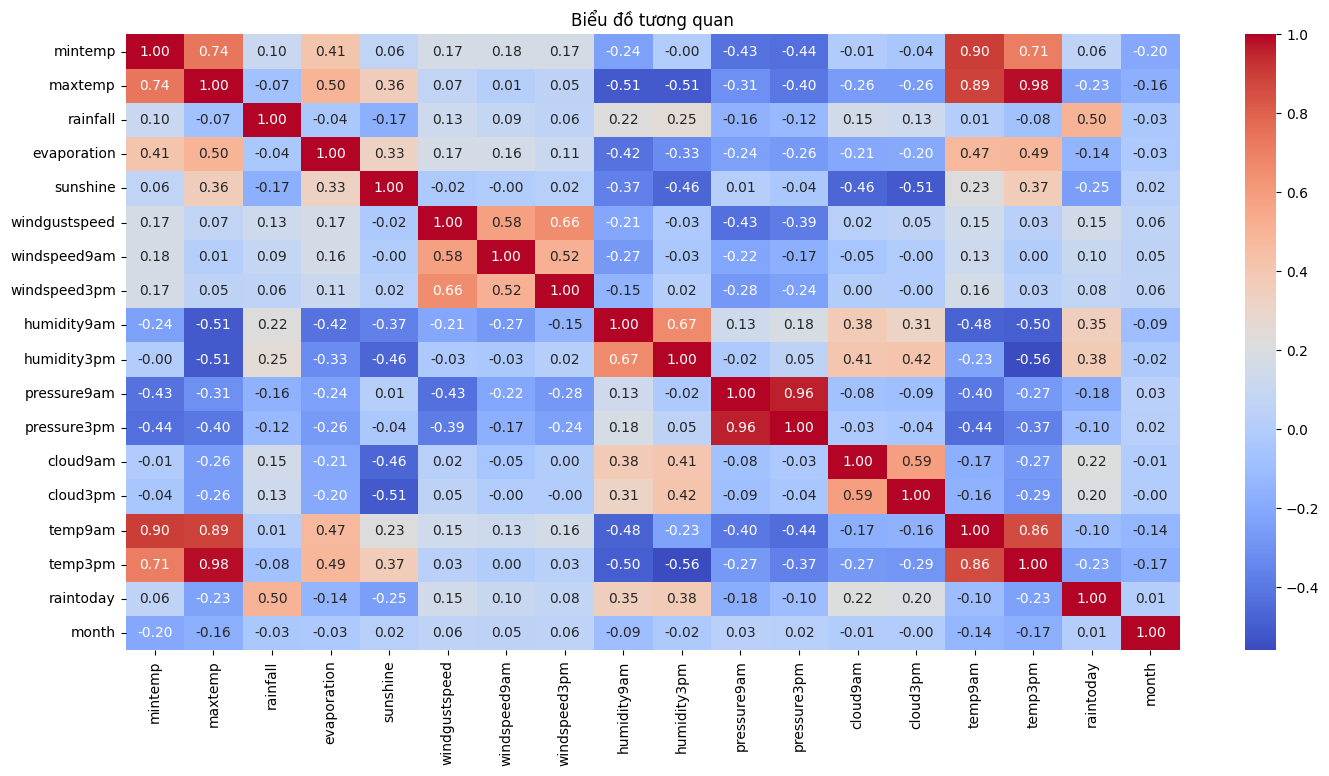

In [ ]:
corr = df.select_dtypes(include = 'number').corr()
plt.figure(figsize=(17,8))
sns.heatmap(corr, annot = True, fmt = '.2f',cmap='coolwarm')
plt.title('Biểu đồ tương quan')
plt.show()

Raintoday: Đây là biến có ảnh hưởng mạnh nhất vì nó là "phiên bản phân loại" của chính biến mục tiêu rainfall (thường raintoday = 1 khi rainfall > 1mm).Nó giúp mô hình thu hẹp phạm vi dự báo cực kỳ nhanh chóng: nếu là 0, lượng mưa gần như chắc chắn bằng 0; nếu là 1, mô hình mới bắt đầu tính toán độ lớn của lượng mưa.              
Độ ẩm và Mây : humidity3pm và cloud3pm là. Khi độ ẩm chiều và độ che phủ mây tăng cao, lượng mưa có xu hướng tăng.

Số giờ nắng (Tương quan nghịch mạnh nhất): sunshine tỷ lệ nghịch với lượng mưa. Nắng càng nhiều thì lượng mưa càng ít; đây là biến số có khả năng loại trừ mưa tốt nhất.

Áp suất khí quyển (Tương quan nghịch): pressure9am và pressure3pm thường tỉ lệ nghịch với lượng mưa. Áp suất thấp là dấu hiệu đặc trưng của các hệ thống thời tiết gây mưa bão.

Nhiệt độ và Gió (Tương quan yếu): Các biến như temp, mintemp, maxtemp và tốc độ gió có tương quan khá thấp với lượng mưa. Chúng đóng vai trò là biến hỗ trợ chứ không phải yếu tố quyết định chính.

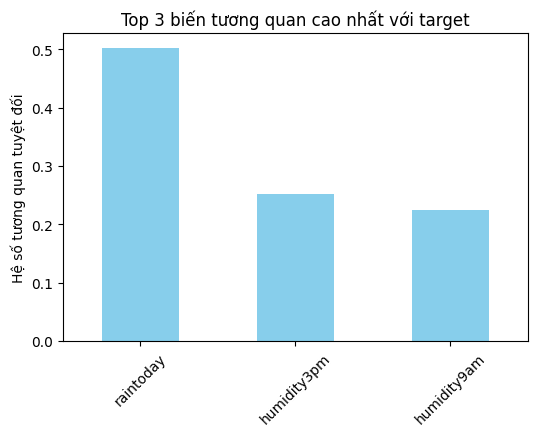

In [ ]:
# 3 biến có tương quan lớn nhất
# Lấy tương quan của tất cả biến với biến mục tiêu
target_corr = corr['rainfall'].drop('rainfall')
# Sắp xếp theo độ lớn tương quan (giảm dần)
top3 = target_corr.abs().sort_values(ascending=False).head(3)
plt.figure(figsize=(6,4))
top3.plot(kind='bar', color='skyblue')
plt.title('Top 3 biến tương quan cao nhất với target')
plt.ylabel('Hệ số tương quan tuyệt đối')
plt.xticks(rotation=45)
plt.show()

###3.2 Thống kê mô tả

In [ ]:
df_so = df.select_dtypes(include = 'number')
df_so.describe(include = 'all')

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,month
count,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000,141330.00000,141330.000000,141330.000000,141330.000000,141330.000000,141330.000000
mean,12.184194,23.227775,2.353328,5.088864,8.101530,39.925745,14.007171,18.594212,68.917562,51.519699,1017.658360,1015.254699,5.01949,4.778685,16.962178,21.718732,0.224128,6.404896
std,6.403567,7.117844,8.430845,3.333515,2.871126,13.173030,8.868905,8.772621,19.059147,20.725399,6.768459,6.701821,2.52574,2.260695,6.508347,6.967898,0.417008,3.426298
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.00000,0.000000,-7.200000,-5.400000,0.000000,1.000000
25%,7.600000,17.900000,0.000000,3.600000,7.500000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.400000,1011.000000,3.00000,3.000000,12.200000,16.600000,0.000000,3.000000
50%,12.000000,22.600000,0.000000,4.600000,8.600000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.200000,6.00000,5.000000,16.700000,21.100000,0.000000,6.000000
75%,16.800000,28.200000,0.800000,5.800000,9.550000,46.000000,19.000000,24.000000,83.000000,66.000000,1021.900000,1019.500000,7.00000,7.000000,21.500000,26.500000,0.000000,9.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.00000,9.000000,40.200000,46.700000,1.000000,12.000000


1. Sự mất cân bằng và độ lệch của Lượng mưa (Rainfall)
Giá trị trung vị (50%) là 0.0: Trong khi giá trị lớn nhất là 371mm, trung bình chỉ 2.35mm. Điều này cho thấy dữ liệu lượng mưa bị lệch phải (skewed) cực kỳ nặng. Đa số các ngày là không mưa hoặc mưa không đáng kể.

Tần suất mưa: Biến raintoday có giá trị trung bình là 0.224, xác nhận rằng chỉ có khoảng 22.4% số ngày trong bộ dữ liệu là thực sự có mưa.

2. Sự biến thiên của Nhiệt độ và Độ ẩm
Biên độ nhiệt lớn: Nhiệt độ dao động từ thấp nhất -8.5°C đến cao nhất 48.1°C. Khoảng cách giữa 25% (17.9°C) và 75% (28.2°C) của maxtemp cho thấy thời tiết Úc có sự phân hóa rất rõ rệt theo vùng và mùa.

Độ ẩm giảm dần trong ngày: Độ ẩm lúc 9h sáng (trung bình 68.9%) cao hơn rõ rệt so với lúc 3h chiều (51.5%). Đây là quy luật vật lý quan trọng: nhiệt độ tăng vào buổi chiều làm độ ẩm tương đối giảm xuống.

3. Các chỉ số về Bầu trời (Sunshine, Cloud)
Nắng nhiều: Trung bình có 8.1 giờ nắng/ngày. Với trung vị là 8.6 giờ, ta thấy Úc là quốc gia có nhiều nắng.

Độ che phủ mây: Cả cloud9am và cloud3pm đều có giá trị trung bình quanh mức 4.7 - 5.0 (trên thang điểm 9). Điều này cho thấy trạng thái bầu trời thường xuyên ở mức có mây rải rác.


In [ ]:
# 1. Hàm loại bỏ ngoại lai bằng IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Lọc dữ liệu nằm trong khoảng an toàn
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# 2. Áp dụng cho các cột quan trọng (Nhiệt độ, Áp suất, Lượng mưa)
cols_to_clean = ['rainfall', 'evaporation', 'windgustspeed', 'humidity9am', 'humidity3pm']
df = remove_outliers_iqr(df, cols_to_clean)

###3.3 EDA

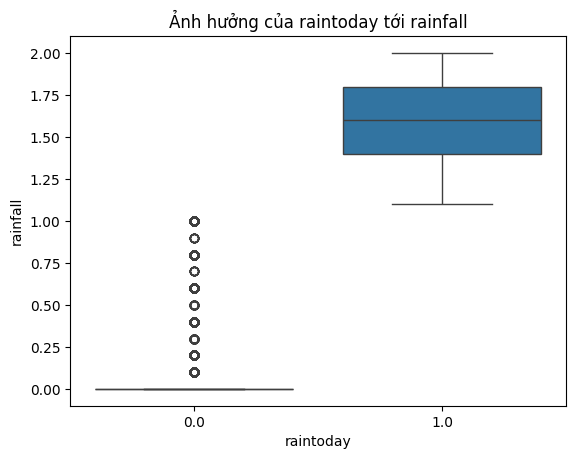

In [ ]:
# Ảnh hưởng của raintoday tới rainfall
sns.boxplot(data= df, x= 'raintoday', y = 'rainfall')
plt.title('Ảnh hưởng của raintoday tới rainfall')
plt.show()

- Khi raintoday = 0 (không mưa hôm nay), lượng mưa ghi nhận rất thấp, hầu như không đáng kể.
- Khi raintoday = 1 (có mưa hôm nay), lượng mưa trung bình cao hơn hẳn, phân bố rộng và có nhiều giá trị ngoại lệ.


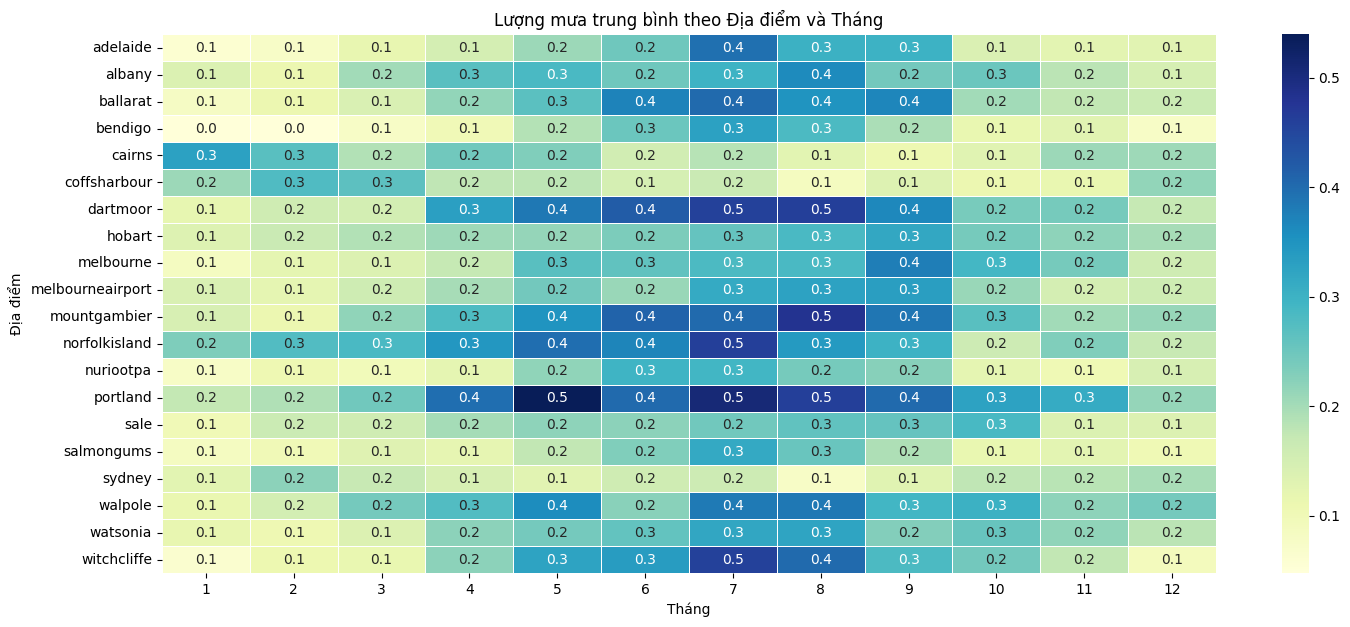

In [ ]:
# Chọn Top 20 địa điểm mưa nhiều nhất
top_locations = df.groupby('location')['rainfall'].sum().nlargest(20).index
df_subset = df[df['location'].isin(top_locations)]

# Tạo bảng Pivot (Trục Y là Location, Trục X là Month, giá trị là trung bình Rainfall)
heatmap_data = df_subset.pivot_table(index='location',
                                    columns='month',
                                    values='rainfall',
                                    aggfunc='mean')

# Vẽ biểu đồ Heatmap
plt.figure(figsize=(17, 7))
sns.heatmap(heatmap_data,
            annot=True,
            cmap='YlGnBu',
            fmt='.1f',
            linewidths=.5)
plt.title('Lượng mưa trung bình theo Địa điểm và Tháng')
plt.xlabel('Tháng')
plt.ylabel('Địa điểm')
plt.show()

12-2 -> mùa hè; 3-5 -> mùa thu; 6-8 -> mùa đông; 9-11 -> mùa xuân

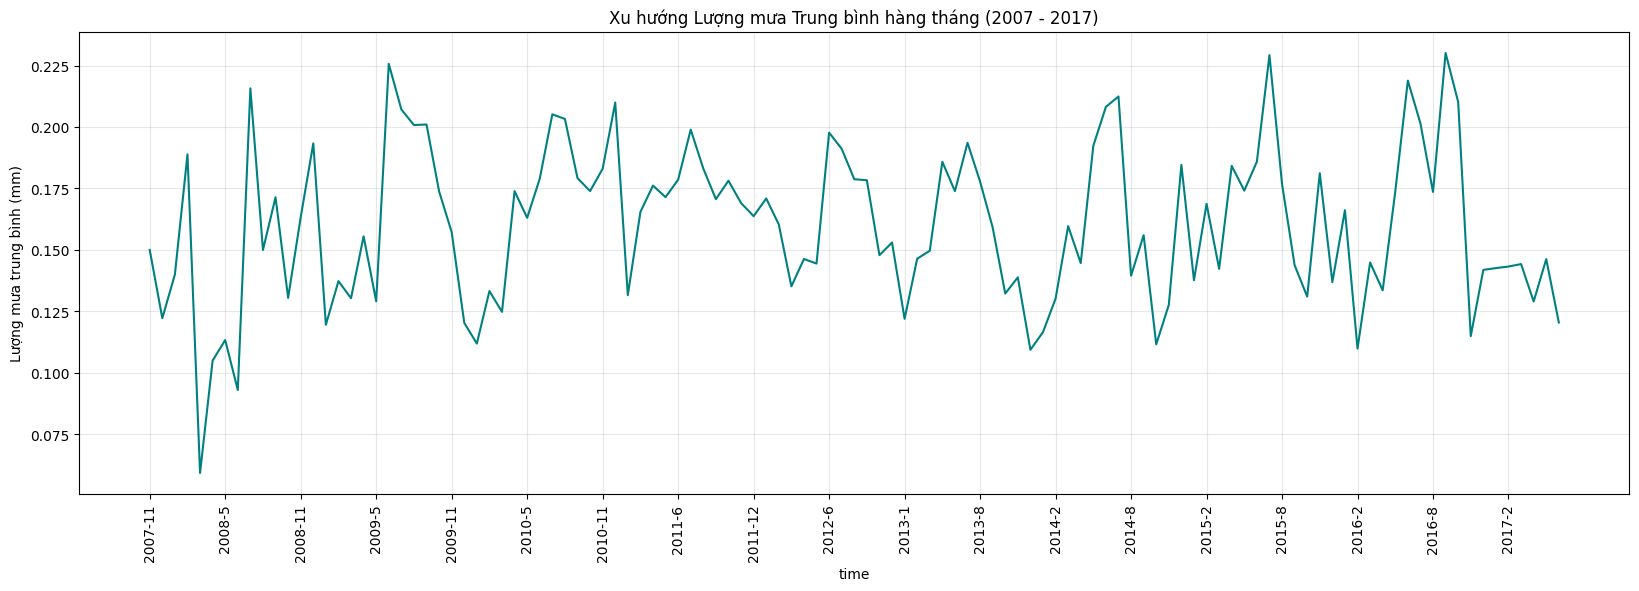

In [ ]:
#  Xu hướng Lượng mưa theo thời gian
plt.figure(figsize=(20, 6))
# Gom nhóm theo tháng và năm để đường biểu đồ mượt hơn
df['year'] = df['date'].dt.year
monthly_rain = df.groupby(['year', 'month'])['rainfall'].mean().reset_index()
monthly_rain['time'] = monthly_rain['year'].astype(str) + '-' + monthly_rain['month'].astype(str)
sns.lineplot(data=monthly_rain, x='time', y='rainfall', color='teal')
plt.xticks(rotation=90, ticks=plt.gca().get_xticks()[::6]) # Hiển thị nhãn mỗi 6 tháng
plt.title('Xu hướng Lượng mưa Trung bình hàng tháng (2007 - 2017)')
plt.ylabel('Lượng mưa trung bình (mm)')
plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipython-input-615702191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wind_rain.index, y=wind_rain.values, palette='coolwarm')


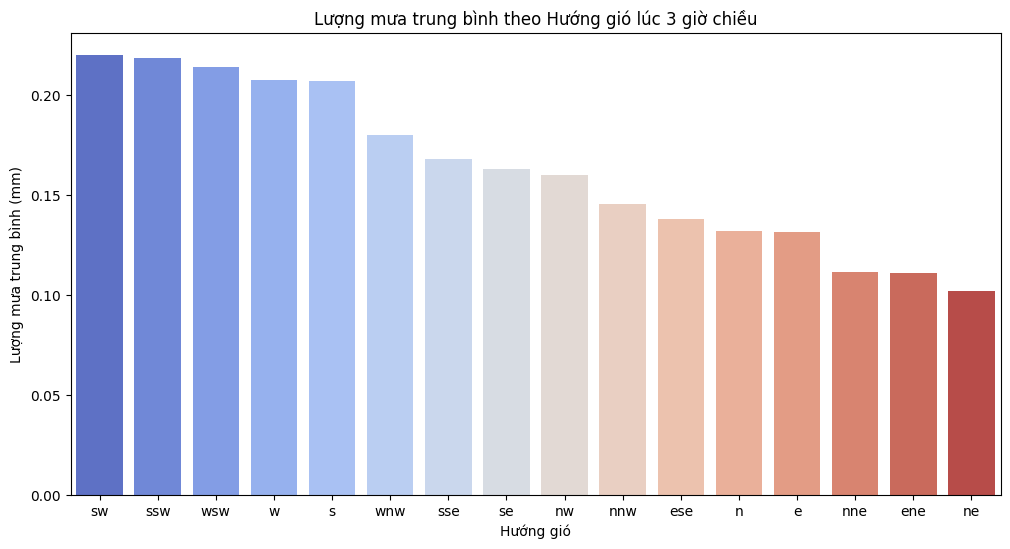

In [ ]:
# Lượng mưa trung bình theo Hướng gió 3pm
plt.figure(figsize=(12, 6))
wind_rain = df.groupby('winddir3pm')['rainfall'].mean().sort_values(ascending=False)
sns.barplot(x=wind_rain.index, y=wind_rain.values, palette='coolwarm')
plt.title('Lượng mưa trung bình theo Hướng gió lúc 3 giờ chiều')
plt.xlabel('Hướng gió')
plt.ylabel('Lượng mưa trung bình (mm)')
plt.show()

/tmp/ipython-input-1912098526.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='maxtemp', data=df_box, palette='Set3')


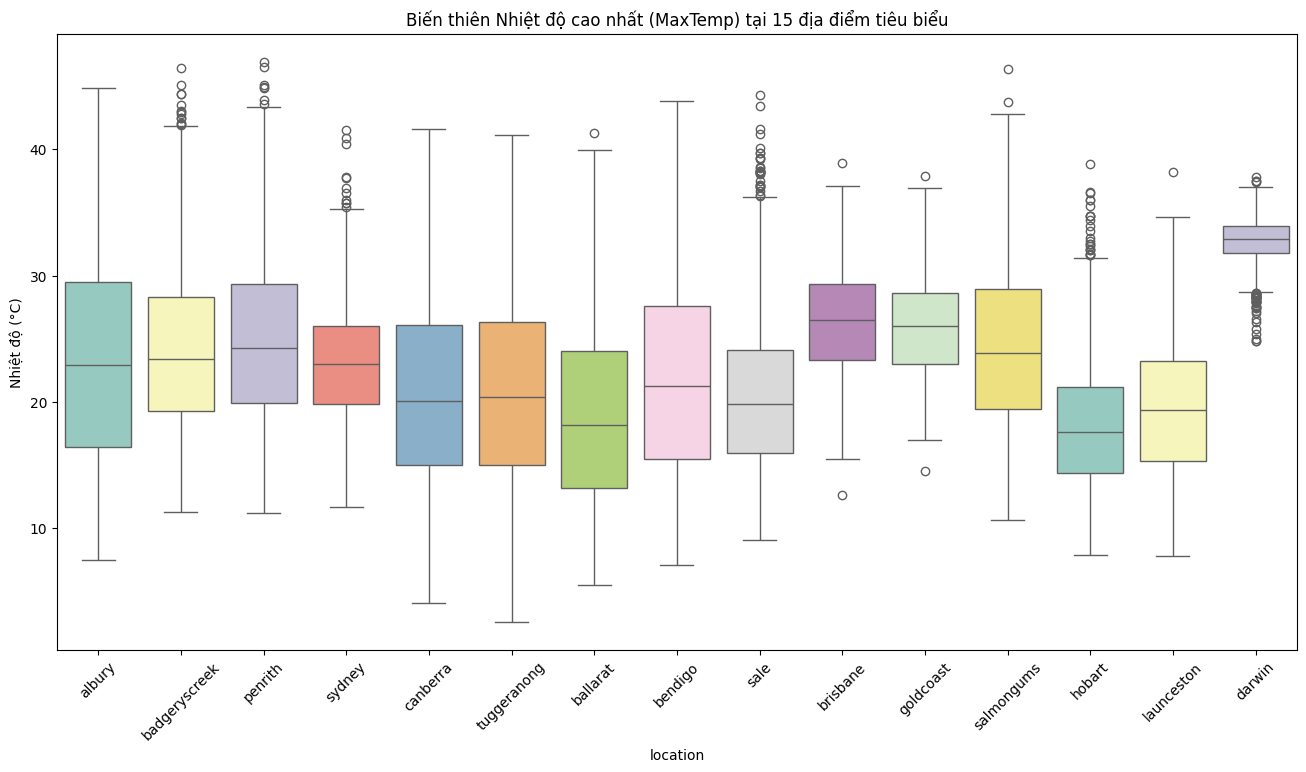

In [ ]:
# Biên độ nhiệt (Min/Max) theo Địa điểm (Box Plot)
plt.figure(figsize=(16, 8))
# Chọn 15 địa điểm
top_15_locs = df['location'].value_counts().nlargest(15).index
df_box = df[df['location'].isin(top_15_locs)]
sns.boxplot(x='location', y='maxtemp', data=df_box, palette='Set3')
plt.title('Biến thiên Nhiệt độ cao nhất (MaxTemp) tại 15 địa điểm tiêu biểu')
plt.xticks(rotation=45)
plt.ylabel('Nhiệt độ (°C)')
plt.show()

###3.4 Kỹ thuật đặc trưng

In [ ]:
# Tạo các biến chênh lệch
df['pressure_delta'] = df['pressure3pm'] - df['pressure9am']
df['temp_delta'] = df['temp3pm'] - df['temp9am']
df['humidity_delta'] = df['humidity3pm'] - df['humidity9am']
df['temp_range'] = df['maxtemp'] - df['mintemp']
# Mã hóa vòng tròn cho Tháng
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
# Sau khi tạo xong,bỏ cột 'month' cũ để tránh đa cộng tuyến
df = df.drop(columns=['month'])
# Xoá cột date
df = df.drop(columns=['date'])

In [ ]:
# Khởi tạo công cụ mã hóa
le = LabelEncoder()
# Danh sách các cột dạng chữ
cat_cols = ['location', 'windgustdir', 'winddir9am', 'winddir3pm']
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

#PHÂN TÍCH DỰ BÁO

###4.1 Chia tập dữ liệu

In [ ]:
X = df.drop(columns=['rainfall'])
y = df['rainfall']
# Chia dữ liệu theo tỷ lệ 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Kiểm tra kích thước sau khi chia
print(f"Tổng số mẫu dữ liệu: {len(df)}")
print(f"Số mẫu Train: {X_train.shape[0]}")
print(f"Số mẫu Test: {X_test.shape[0]}")

Tổng số mẫu dữ liệu: 102436
Số mẫu Train: 81948
Số mẫu Test: 20488


In [ ]:
print(X_train)

        location  mintemp  maxtemp  evaporation  sunshine  windgustdir  \
48662          9     -3.6      7.8          1.4      5.70            6   
80254         44      3.1     17.8          0.8      5.40            3   
108935         1     14.5     20.2          6.2     11.70           13   
2852           2     13.1     29.6          4.6      8.60           15   
122204        31     11.7     31.0          8.0     11.70           11   
...          ...      ...      ...          ...       ...          ...   
8252          10     13.7     26.5          4.4      9.55            0   
77113         33     12.5     16.7          3.4      5.00           10   
108929         1     14.6     24.3          7.0     12.10           13   
1096           2     15.7     34.9          4.6      8.60           11   
22150         27     19.6     24.1          5.6      2.60            5   

        windgustspeed  winddir9am  winddir3pm  windspeed9am  windspeed3pm  \
48662            57.0          10 

###4.2 Xây dựng và huấn luyện mô hình

In [ ]:
# Khởi tạo mô hình
rf_model = RandomForestRegressor(
 n_estimators=200,
    max_depth=12,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)
# Huấn luyện mô hình trên tập Train
rf_model.fit(X_train, y_train)
# Dự báo trên tập Test
y_pred = rf_model.predict(X_test)

###4.3 Đánh giá mô hình

In [ ]:
# Tính toán các chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = len(y_test)     # Số lượng mẫu quan sát của tập test
k = X.shape[1]       # Số lượng biến độc lập
r2_adj = 1 - (1-r2) * (n-1) / (n-k-1)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f'Hệ số xác định hiệu chỉnh (R^2_adj): {r2_adj:.4f}')

Mean Absolute Error (MAE): 0.1148
Mean Squared Error (MSE): 0.0371
Root Mean Squared Error (RMSE): 0.1926
R-squared (R²): 0.7702
Hệ số xác định hiệu chỉnh (R^2_adj): 0.7699


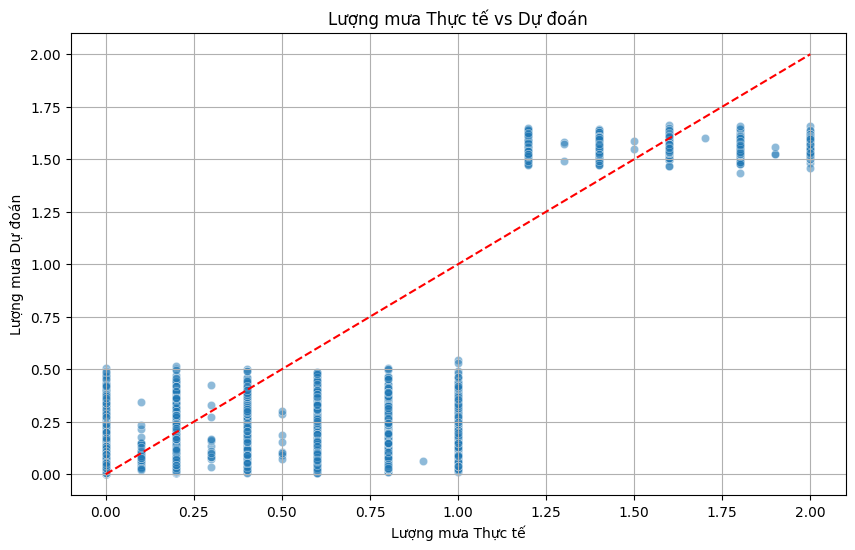

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Đường dự đoán hoàn hảo
plt.xlabel('Lượng mưa Thực tế')
plt.ylabel('Lượng mưa Dự đoán')
plt.title('Lượng mưa Thực tế vs Dự đoán')
plt.grid(True)
plt.show()

Đánh giá overfiting

In [ ]:
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
print(f"Độ chính xác trên tập Train: {train_score:.4f}")
print(f"Độ chính xác trên tập Test: {test_score:.4f}")

Độ chính xác trên tập Train: 0.8251
Độ chính xác trên tập Test: 0.7702


Kiểm định chéo

In [ ]:
# Định nghĩa các độ đo cần tính
metrics = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error'
}

# Chạy kiểm định chéo
num_splits = 10

cv_results = cross_validate(
    rf_model,
    X_train,
    y_train,
    cv=num_splits,
    scoring=metrics,
    n_jobs=-1,
    return_train_score=False
)

# Xử lý dữ liệu kết quả
cv_summary = pd.DataFrame({
    'Lần chạy': range(1, num_splits + 1),
    'R-squared': cv_results['test_r2'],
    'MAE': -cv_results['test_mae'],
    'RMSE': -cv_results['test_rmse']
})

# Tính toán các giá trị thống kê cuối cùng
mean_r2 = cv_summary['R-squared'].mean()
std_r2 = cv_summary['R-squared'].std()

print("\n" + "="*40)
print(f"TỔNG HỢP KIỂM ĐỊNH {num_splits} LẦN")
print("="*40)
print(f"Chỉ số R² trung bình: {mean_r2:.4f}")
print(f"Độ lệch chuẩn R²:    {std_r2:.4f}")
print(f"Sai số MAE TB:       {cv_summary['MAE'].mean():.4f} mm")
print(f"Sai số RMSE TB:      {cv_summary['RMSE'].mean():.4f} mm")
print("="*40)

# Hiển thị bảng
cv_summary.set_index('Lần chạy', inplace=True)
display(cv_summary.style.background_gradient(cmap='Blues'))


TỔNG HỢP KIỂM ĐỊNH 10 LẦN
Chỉ số R² trung bình: 0.7673
Độ lệch chuẩn R²:    0.0108
Sai số MAE TB:       0.1150 mm
Sai số RMSE TB:      0.1928 mm


,R-squared,MAE,RMSE
Lần chạy,,,
1,0.767178,0.115227,0.193321
2,0.760760,0.114894,0.193965
3,0.754584,0.114393,0.192852
4,0.749475,0.115646,0.194139
5,0.775972,0.115507,0.193288
6,0.782697,0.113676,0.189931
7,0.762268,0.115636,0.195477
8,0.770056,0.118039,0.195493
9,0.768722,0.113940,0.191308


/tmp/ipython-input-4278051406.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')


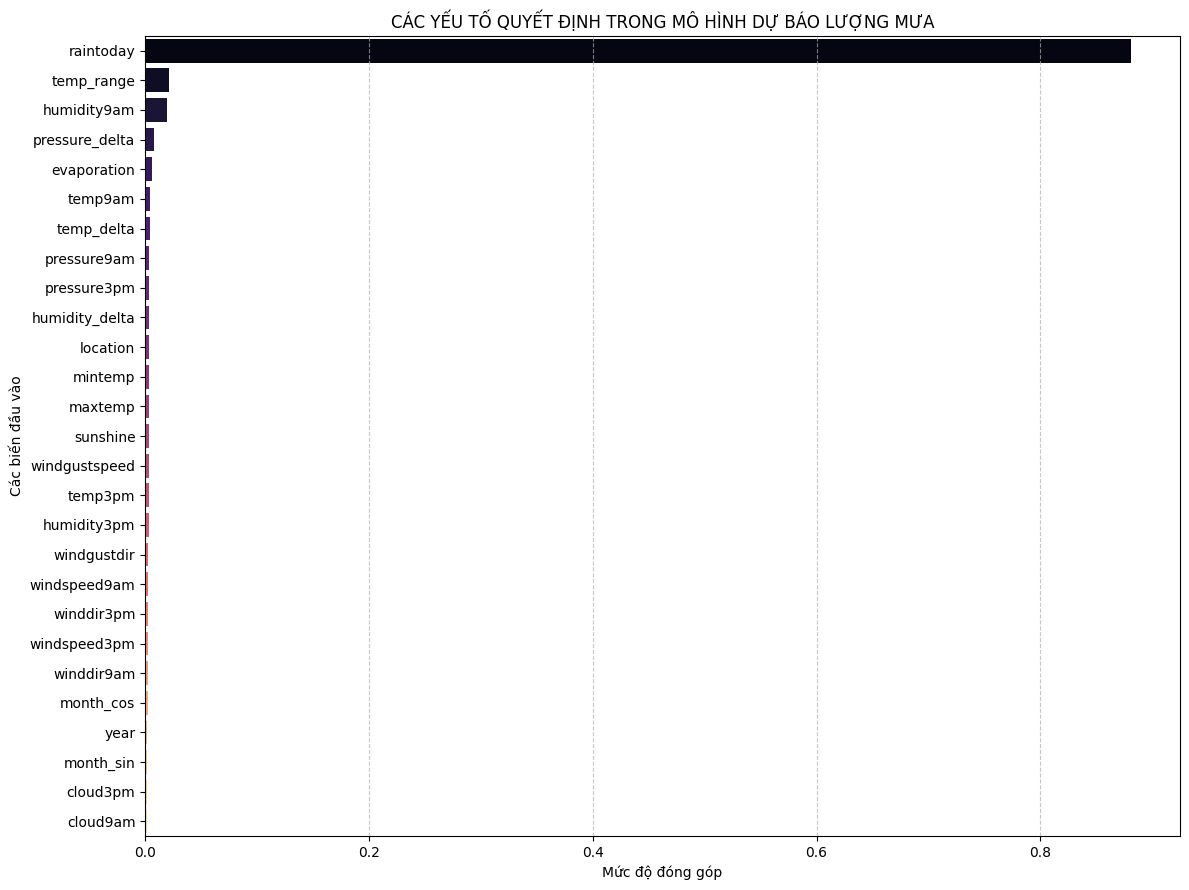

In [ ]:
# Lấy giá trị độ quan trọng từ mô hình đã huấn luyện
importances = rf_model.feature_importances_
feature_names = X.columns

# Tạo DataFrame để quản lý và sắp xếp
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ Barplot
plt.figure(figsize=(12, 9))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')

# Tinh chỉnh tiêu đề và nhãn
plt.title('CÁC YẾU TỐ QUYẾT ĐỊNH TRONG MÔ HÌNH DỰ BÁO LƯỢNG MƯA')
plt.xlabel('Mức độ đóng góp')
plt.ylabel('Các biến đầu vào')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder

# 1. Huấn luyện lại LabelEncoder và lưu riêng từng cái
# Lý do: Để web biết "Sydney" là số mấy, "W" (hướng tây) là số mấy.
encoders = {}
# Changed 'location' to 'Location', 'windgustdir' to 'WindGustDir', etc.
cat_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Load lại dữ liệu gốc chưa mã hóa để fit encoder (hoặc dùng df trước khi mã hóa)
for col in cat_cols:
    le = LabelEncoder()
    le.fit(data[col].astype(str)) # data is the original DataFrame with capitalized column names
    encoders[col] = le

# 2. Lưu mô hình và bộ encoders vào file
joblib.dump(rf_model, 'rainfall_model.pkl')
joblib.dump(encoders, 'encoders.pkl')


['encoders.pkl']